# Fixed-Flat Appliance

Some of the appliances have a very deterministic consumption patterns. For example, light bulbs that are often used for securty purposes, are usually switched on with a specific schdule. Appliances as such are identified as flat appliances in RAMP, meaning that there are not subjected to random variability in terms of total usage time. 

In case that there are multiple appliances of the same type that are always switched on togehter, you can attribute the appliance defintion with the fixed flag, which makes the swtich on and off events synced for the appliances of the same type. 

In this example, we will model the security lights of a school to clarify on this characteristics:

In [64]:
# importing functions
from ramp import User, UseCase
import pandas as pd
import matplotlib.pyplot as plt

### Creating a user

In [57]:
school = User(user_name="School", num_users=1)

### Adding an appliance with flat and fixed consumption

In [58]:
security_lights = school.add_appliance(
    name="Security Light Bulb",
    number=10,
    power=25,
    num_windows=1,
    func_time=210,
    func_cycle=60,
    fixed="yes",  # This means all the 'n' appliances of this kind are always switched-on together
    flat="yes",  # This means the appliance is not subject to random variability in terms of total usage time
    window_1 = [1200, 1440],  # from 20:00 to 24:00
)


### Generating the profiles using UseCase class

Similar to previous example, you can generate the load profiles using the UseCase class. In this example, we use another functionality of the UseCase class by identifying the starting date of the simulation and the number of days for generating the profiles:

In [59]:
school_case = UseCase(
    users=[school], # users of the usecase
    date_start="2023-01-01", # start date
    )

# when both date_start and date_end are not given, you need to initialize the usecase by this method and by passing the number of days as num_days
school_case.initialize(
    num_days=7
    )

You will simulate 7 day(s) from 2023-01-01 00:00:00 until 2023-01-08 00:00:00


<Axes: >

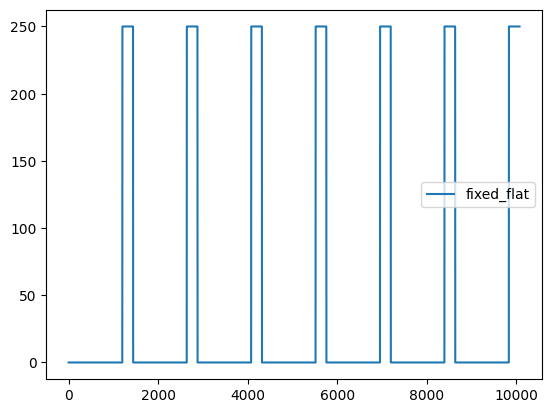

In [60]:
fixed_flat = school_case.generate_daily_load_profiles()
fixed_flat = pd.DataFrame(fixed_flat, columns=["fixed_flat"])
fixed_flat.plot()

As it can be seen, in each day, all the 10 lights with 25 Watt power (aggregated power of 250) are always switched on together on the specified schedule.

To make the effect of parameters, lets look how the profiles would look like without using fixed and flat properties:

In [61]:
security_lights.fixed = "no"
security_lights.flat = "no"
no_fix_no_flat = school_case.generate_daily_load_profiles()
no_fix_no_flat = pd.DataFrame(no_fix_no_flat, columns=["no_fix_no_flat"])

security_lights.fixed = "yes"
fix_no_flat = school_case.generate_daily_load_profiles()
fix_no_flat = pd.DataFrame(fix_no_flat, columns=["fix_no_flat"])

AttributeError: Line2D.set() got an unexpected keyword argument 'subplot'

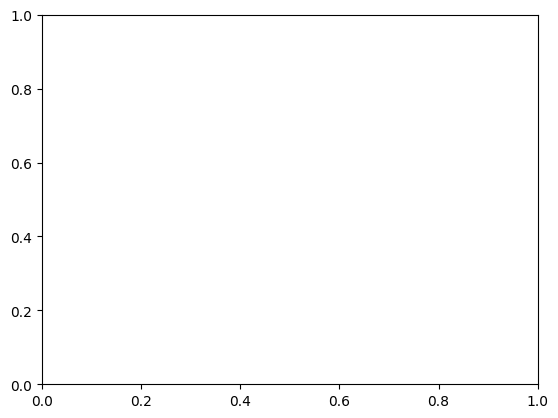

In [63]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # Adjust figsize as needed

# Plot each column on a separate subplot
for i, df in enumerate([fixed_flat,no_fix_no_flat,fix_no_flat]):
    df.plot(ax=axes[i], color='blue', marker='o', linestyle='-')
    axes[i].set_title(df.columns[0])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [24]:
first_week = school_case.generate_daily_load_profiles()

<Axes: >

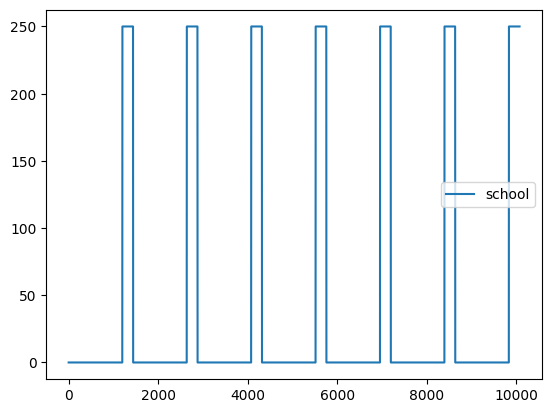

In [25]:
first_week = pd.DataFrame(first_week, columns=["school"])
first_week.plot()